<a href="https://colab.research.google.com/github/Sindhu22204/exfiltration-detection/blob/main/exfiltration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn tensorflow matplotlib


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the Dataset
df = pd.read_csv('cicids2018.csv')  # Make sure the filename matches the uploaded file

# Data Overview
print("Data Overview:")
print(df.head())  # Display the first few rows to understand the structure

# Data Preprocessing
def clean_data(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_clean = df.copy()
    df_clean[numeric_cols] = df_clean[numeric_cols].replace([np.inf, -np.inf], np.nan)
    df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].max().max() + 1)
    return df_clean

# Clean the DataFrame
df = clean_data(df)

# Define Features (X) and Labels (y)
label_column = 'Label'  # Adjust based on your dataset's actual label column
df[label_column] = df[label_column].astype('category').cat.codes  # Convert labels to numerical values

# Drop non-numeric columns from features (like Timestamp)
X = df.drop(columns=[label_column, 'Timestamp'])  # Drop the label and non-numeric columns
y = df[label_column]  # Labels

# Ensure all columns in X are numeric
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns
y = y.astype(float)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


Data Overview:
   Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0       443         6  02/03/2018 08:47:38         141385             9   
1     49684         6  02/03/2018 08:47:38            281             2   
2       443         6  02/03/2018 08:47:40         279824            11   
3       443         6  02/03/2018 08:47:40            132             2   
4       443         6  02/03/2018 08:47:41         274016             9   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             7              553           3773.0              202   
1             1               38              0.0               38   
2            15             1086          10527.0              385   
3             0                0              0.0                0   
4            13             1285           6141.0              517   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...              20.0  

In [ ]:
# Define the Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (adjust for multi-class)

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'sparse_categorical_crossentropy' for multi-class

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)  # Adjust epochs and batch_size as needed

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Make Predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Display Predictions
print("Predicted Classes:")
print(predicted_classes.flatten())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9213/9213 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9915 - loss: 1905.5769 - val_accuracy: 0.9964 - val_loss: 432.2850
Epoch 2/20
9213/9213 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9981 - loss: 314.4286 - val_accuracy: 0.9990 - val_loss: 81.2916
Epoch 3/20
9213/9213 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9988 - loss: 128.1776 - val_accuracy: 0.9991 - val_loss: 100.5058
Epoch 4/20
9213/9213 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9988 - loss: 95.0285 - val_accuracy: 0.9992 - val_loss: 15.6080
Epoch 5/20
9213/9213 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9992 - loss: 45.3798 - val_accuracy: 0.9993 - val_loss: 8.8044
Epoch 6/20
9213/9213 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9982 - loss: 6.9131 - val_accuracy: 0.9947 - val_loss: 9.6203
Epoch 7/20
9213/9213 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9929 - loss: 35.8401 - val_accuracy: 0.9985 - val_loss: 0.0157
Epoch 8/20
9213/9213 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.9991
Recall: 0.9991
F1 Score: 0.9991
Confusion Matrix:
[[    0     0     1]
 [    0 35011     0]
 [    0    81 57030]]


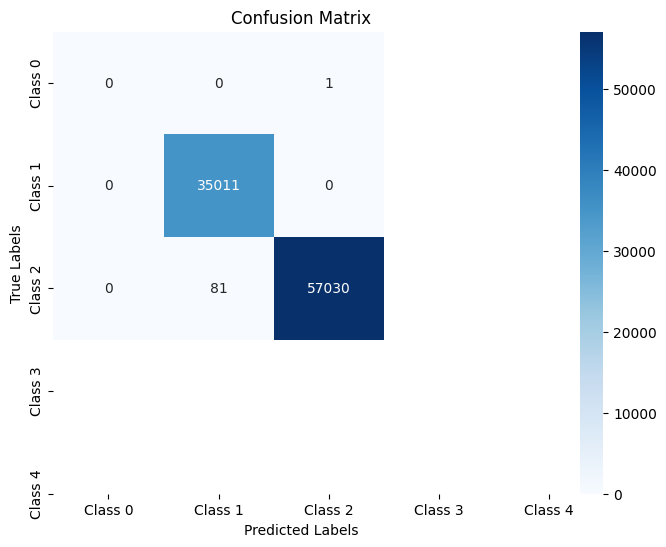


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         1
         0.0       1.00      1.00      1.00     35011
         1.0       1.00      1.00      1.00     57111

    accuracy                           1.00     92123
   macro avg       0.67      0.67      0.67     92123
weighted avg       1.00      1.00      1.00     92123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate Metrics for Multiclass
precision = precision_score(y_test, predicted_classes, average='weighted')  # Change 'binary' to 'weighted' or other options
recall = recall_score(y_test, predicted_classes, average='weighted')  # Change 'binary' to 'weighted' or other options
f1 = f1_score(y_test, predicted_classes, average='weighted')  # Change 'binary' to 'weighted' or other options

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))



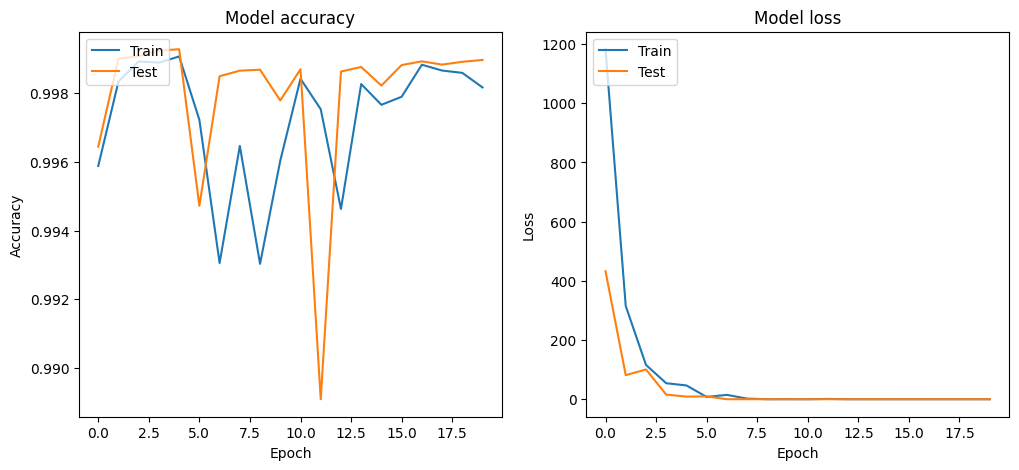

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [ ]:
model.save('exfiltration_model.h5')  # Save the model to a file
